In [1]:
import pandas as pd
import numpy as np
import time
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

In [2]:
try:
    df = pd.read_csv('heart_2020_processed.csv')
    df_main = df.copy()
    print("Đã đọc file heart_2020_processed.csv thành công!")
    display(df.head())
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'heart_2020_processed.csv'. Vui lòng upload file này.")

Đã đọc file heart_2020_processed.csv thành công!


,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,...,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,-1.844750,-0.046751,3.281069,-1.460354,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,3.0,1.0,3.0,1.0,0.0,1.0
1,0,-1.256338,-0.424070,-0.490039,-0.067601,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,12.0,0.0,1.0,3.0,0.0,0.0,0.0
2,0,-0.274603,2.091388,3.281069,0.628776,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,9.0,3.0,1.0,1.0,1.0,0.0,0.0
3,0,-0.647473,-0.424070,-0.490039,-0.763977,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,0.0,0.0,2.0,0.0,0.0,1.0
4,0,-0.726138,3.097572,-0.490039,0.628776,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,4.0,0.0,1.0,3.0,0.0,0.0,0.0


In [3]:
try:
    df_train_bal = pd.read_csv('/content/train_balanced.csv')
    print("\nĐã đọc file train_balanced.csv thành công!")
    display(df_train_bal.head())

    print("\n--- BẢNG THỐNG KÊ TRAIN BALANCED ---")
    display(df_train_bal.describe())
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file '/content/train_balanced.csv'. Vui lòng upload file này.")


Đã đọc file train_balanced.csv thành công!


,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,...,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,-0.167619,-0.424070,-0.490039,-0.067601,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,9.0,0.0,1.0,2.0,0.0,0.0,0.0
1,0,-0.722991,-0.424070,-0.238631,-0.067601,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,1.0,4.0,0.0,0.0,0.0
2,0,-0.147166,-0.424070,-0.490039,0.628776,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,11.0,0.0,1.0,4.0,0.0,0.0,0.0
3,0,-1.003038,-0.424070,0.389886,0.628776,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,1.0,2.0,0.0,1.0,0.0
4,1,-0.000849,3.349118,-0.490039,0.628776,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,12.0,0.0,0.0,1.0,0.0,1.0,0.0



--- BẢNG THỐNG KÊ TRAIN BALANCED ---


,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,...,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.500000,0.076887,0.251070,0.046521,0.011804,0.018475,0.01895,0.066150,0.070725,0.033450,...,0.093300,0.242975,0.525825,7.767675,0.695475,0.710375,2.217975,0.155375,0.077250,0.133150
std,0.500006,1.024066,1.250976,1.078727,1.107455,0.134663,0.13635,0.248547,0.256368,0.179811,...,0.290856,0.428885,0.499339,3.364771,1.241945,0.453594,1.139427,0.362266,0.266991,0.339741
min,0.000000,-2.505534,-0.424070,-0.490039,-4.245859,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.619154,-0.424070,-0.490039,-0.763977,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.500000,-0.081087,-0.424070,-0.490039,-0.067601,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,1.000000,0.584416,0.204795,-0.112928,0.628776,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,10.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
max,1.000000,8.601923,3.349118,3.281069,11.770800,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,12.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000


Dưới đây là mã nguồn xây dựng hàm chia tách dữ liệu thủ công. Mục tiêu là phân chia tập dữ liệu thành các phần riêng biệt nhằm phục vụ quá trình huấn luyện và đánh giá hiệu năng mô hình trên dữ liệu chưa từng tiếp cận.

In [4]:
def train_test_split_manual(X, y, test_size=0.2, random_state=None):
    n_samples = len(X)
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.random.permutation(n_samples)
    test_count = int(n_samples * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    return X_train, X_test, y_train, y_test

In [5]:
class ManualGaussianNB:
    def __init__(self, var_smoothing=1e-9):
        self.var_smoothing = var_smoothing
        self.classes = None
        self.mean = None
        self.var = None
        self.priors = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_features = X.shape[1]
        self.mean = np.zeros((len(self.classes), n_features))
        self.var = np.zeros((len(self.classes), n_features))
        self.priors = np.zeros(len(self.classes))

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i, :] = X_c.mean(axis=0)
            self.var[i, :] = X_c.var(axis=0) + self.var_smoothing
            self.priors[i] = X_c.shape[0] / float(len(X))

    def _calculate_likelihood(self, class_idx, X):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-(X - mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = np.log(self.priors[i])
            likelihoods = np.log(self._calculate_likelihood(i, X) + 1e-15)
            posterior = prior + np.sum(likelihoods, axis=1)
            posteriors.append(posterior)
        return self.classes[np.argmax(np.array(posteriors), axis=0)]

In [6]:
target = 'HeartDisease'

if 'df_main' in locals() and 'df_train_bal' in locals():

    X_all = df_main.drop(columns=[target]).values
    y_all = df_main[target].values
    _, X_test, _, y_test = train_test_split_manual(X_all, y_all, test_size=0.2, random_state=42)

    X_train = df_train_bal.drop(columns=[target]).values
    y_train = df_train_bal[target].values

    print(f"Kích thước tập Huấn luyện (Balanced): {X_train.shape}")
    print(f"Kích thước tập Kiểm tra (Original): {X_test.shape}")
else:
    print("Lỗi.")

Kích thước tập Huấn luyện (Balanced): (40000, 22)
Kích thước tập Kiểm tra (Original): (63959, 22)


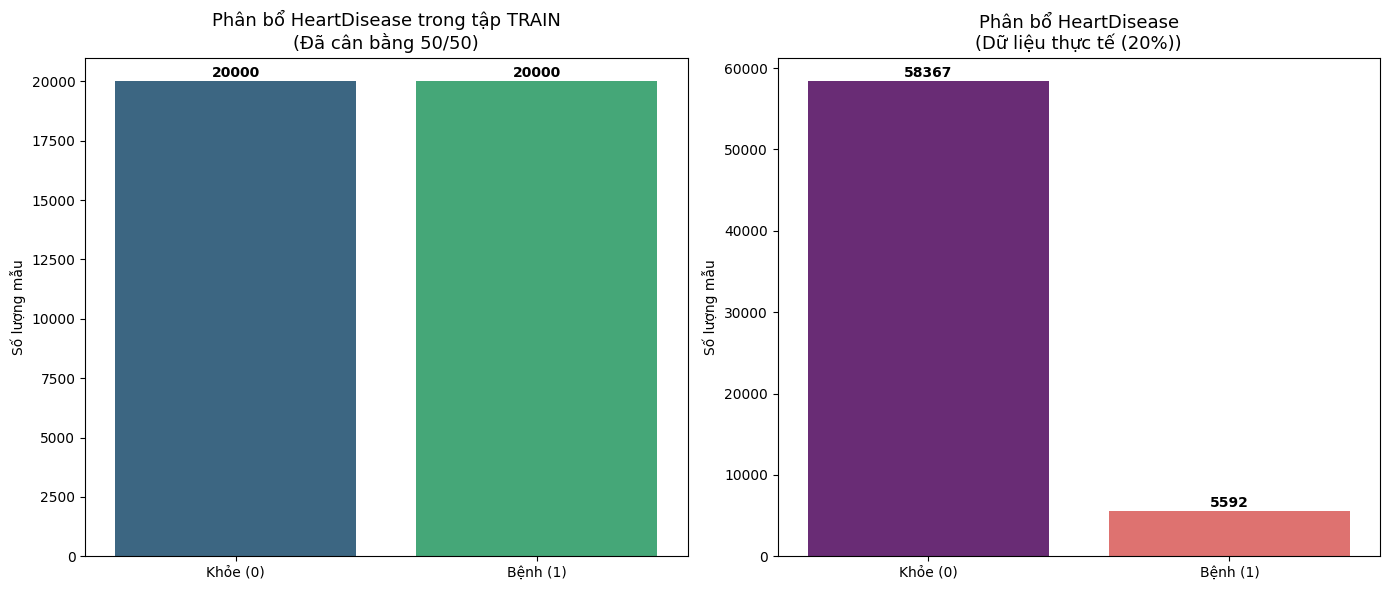

In [7]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=['Khỏe (0)', 'Bệnh (1)'], y=counts_train, hue=['Khỏe (0)', 'Bệnh (1)'], palette='viridis', legend=False)
plt.title('Phân bổ HeartDisease trong tập TRAIN\n(Đã cân bằng 50/50)', fontsize=13)
plt.ylabel('Số lượng mẫu')
for i, v in enumerate(counts_train):
    plt.text(i, v + 200, str(v), ha='center', fontweight='bold')

plt.subplot(1, 2, 2)
sns.barplot(x=['Khỏe (0)', 'Bệnh (1)'], y=counts_test, hue=['Khỏe (0)', 'Bệnh (1)'], palette='magma', legend=False)
plt.title('Phân bổ HeartDisease\n(Dữ liệu thực tế (20%))', fontsize=13)
plt.ylabel('Số lượng mẫu')
for i, v in enumerate(counts_test):
    plt.text(i, v + 500, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Công thức:


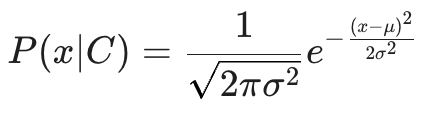

Khi bạn thay đổi var_smoothing, bạn đang thay đổi mẫu số phương sai thành:
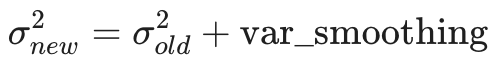

In [8]:
smoothing_candidates = np.logspace(-12, -1, num=100)
best_acc = 0
best_smoothing = 1e-9

history = []

print(f"{'Step':^5} | {'Smoothing':^12} | {'Train Acc':^12}")
print("-" * 35)

for i, s in enumerate(smoothing_candidates):
    model = ManualGaussianNB(var_smoothing=s)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    acc = np.mean(y_pred_train == y_train)

    history.append((s, acc))

    if i % 10 == 0:
        print(f"{i+1:^5} | {s:^12.1e} | {acc:^12.4f}")

    if acc > best_acc:
        best_acc = acc
        best_smoothing = s

print("-" * 35)
print(f"==> Sau khi train thông số tốt nhất: {best_smoothing:.2e}")
print(f"==> Accuracy cao nhất đạt được: {best_acc:.4f}")

Step  |  Smoothing   |  Train Acc  
-----------------------------------
  1   |   1.0e-12    |    0.7171   
 11   |   1.3e-11    |    0.7171   
 21   |   1.7e-10    |    0.7171   
 31   |   2.2e-09    |    0.7171   
 41   |   2.8e-08    |    0.7171   
 51   |   3.6e-07    |    0.7171   
 61   |   4.6e-06    |    0.7171   
 71   |   6.0e-05    |    0.7171   
 81   |   7.7e-04    |    0.7176   
 91   |   1.0e-02    |    0.7193   
-----------------------------------
==> Sau khi train thông số tốt nhất: 1.29e-02
==> Accuracy cao nhất đạt được: 0.7196


In [10]:
y_train_pred = final_nb_model.predict(X_train)

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred, average='weighted')
rec_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')
cm_train = confusion_matrix(y_train, y_train_pred)

print("=== KẾT QUẢ TRÊN TẬP TRAIN ===")
print(f"Accuracy  : {acc_train:.4f}")
print(f"Precision : {prec_train:.4f}")
print(f"Recall    : {rec_train:.4f}")
print(f"F1-Score  : {f1_train:.4f}")

print("\nConfusion Matrix (Train):")
print(cm_train)

=== KẾT QUẢ TRÊN TẬP TRAIN ===
Accuracy  : 0.7196
Precision : 0.7257
Recall    : 0.7196
F1-Score  : 0.7177

Confusion Matrix (Train):
[[16037  3963]
 [ 7253 12747]]


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

final_nb_model = ManualGaussianNB(var_smoothing=0.0129)
final_nb_model.fit(X_train, y_train)

y_test_pred_final = final_nb_model.predict(X_test)

acc = accuracy_score(y_test, y_test_pred_final)
prec = precision_score(y_test, y_test_pred_final, average='weighted')
rec = recall_score(y_test, y_test_pred_final, average='weighted')
f1 = f1_score(y_test, y_test_pred_final, average='weighted')
cm = confusion_matrix(y_test, y_test_pred_final)

print("=== KẾT QUẢ ===")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-Score  : {f1:.4f}")

print("\nConfusion Matrix:")
print(cm)


=== KẾT QUẢ ===
Accuracy  : 0.7849
Precision : 0.8943
Recall    : 0.7849
F1-Score  : 0.8250

Confusion Matrix:
[[46667 11700]
 [ 2060  3532]]


In [44]:
y_train_pred = final_nb_model.predict(X_train)

df_train_output = pd.DataFrame(y_train_pred, columns=['NB_Predicted'])

df_train_output.to_csv('NaiveBayes_output.csv', index=False)

print("--- ĐÃ LƯU KẾT QUẢ FILE NaiveBayes_output.csv THÀNH CÔNG ---")
print(f"Kích thước file Train: {df_train_output.shape}")


--- ĐÃ LƯU KẾT QUẢ FILE NaiveBayes_output.csv THÀNH CÔNG ---
Kích thước file Train: (40000, 1)


In [10]:
import joblib

final_nb_model = ManualGaussianNB(var_smoothing=best_smoothing)
final_nb_model.fit(X_train, y_train)

model_filename = 'naivebayes_model.joblib'
joblib.dump(final_nb_model, model_filename)

print(f"--- ĐÃ XUẤT FILE MÔ HÌNH {model_filename} THÀNH CÔNG ---")
print(f"Thông số đã lưu trong mô hình: var_smoothing = {best_smoothing:.2e}")

--------------------------------------------------
--- ĐÃ XUẤT FILE MÔ HÌNH naivebayes_model.joblib THÀNH CÔNG ---
Thông số đã lưu trong mô hình: var_smoothing = 1.29e-02
